In [1]:
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Model
from itertools import chain #for target labels 
from keras.utils import np_utils
import seaborn as sns
import pandas as pd
import tensorflow
from tensorflow.keras.models import load_model
from sklearn.metrics import confusion_matrix
from tensorflow.keras.applications.vgg16 import preprocess_input
import cv2
import os
from PIL import Image # for grabbing images
from IPython.display import display, HTML,clear_output
import warnings
warnings.filterwarnings("ignore")


2023-03-31 15:15:20.595856: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
X_test=np.load("test_data.npy");
t_test=np.load("test_labels.npy");
num_of_output_classes=len(np.unique(t_test))
N=X_test.shape[1]; #Number of pixels of image
print("Number of output classes",num_of_output_classes)
X_test=tensorflow.keras.applications.vgg16.preprocess_input(X_test, data_format=None);

12


In [3]:
class_names=["Airport","Beach","Bridge","Dense Residental","Desert","Forest",
             "Industrial","Mountain","Parking","River","Sparse_Residental","Stadium"]

In [4]:
def conf_matrix_w_acc(y_test, labels):
    # Evaluate trained model in validation set
    cm = confusion_matrix(y_test, labels)
    acc =np.diagonal(cm).sum()/ cm.sum()
    # acc = accuracy_score(y_test,labels)
    fig, ax = plt.subplots()
    tick_marks = np.arange(len(class_names))
    plt.xticks(tick_marks, class_names)
    plt.yticks(tick_marks, class_names)
    # create heatmap
    sns.heatmap(pd.DataFrame(cm), annot=True ,fmt='g', xticklabels = class_names, yticklabels = class_names)
    ax.xaxis.set_label_position("top")
    plt.tight_layout()
    plt.title('Confusion Matrix (Accuracy = %f)' % acc, y=1.1)
    plt.ylabel('Actual label')
    plt.xlabel('Predicted label')

## Classifying Test Set From Full Data

In [5]:
def test(class_num,X_test,labels_test,model_name='vgg16_trained_cnn.hdf5',resized_pixel_size=100): 
        #Get Test Data Information, mainly for clarification on our end 
    
        #Setting up labels for keras model
        labels_test_model = np_utils.to_categorical(labels_test, num_classes=class_num)

        # Loads trained model 
        model = tensorflow.keras.models.load_model(model_name)

        #Evaluating model on test data 
        loss,accuracy=model.evaluate(X_test,labels_test_model)

        #Generates probability matrix of label assignment 
        y_proba = model.predict(X_test)

        #Grabs largest probability for each photo belonging to a certain class 
        y_classes = np.argmax(y_proba,axis=1)

        #Prints confustion matrix 
        print(conf_matrix_w_acc(labels_test, y_classes))
        
        return accuracy,y_classes

27/27 [==============================] - 29s 1s/step
None


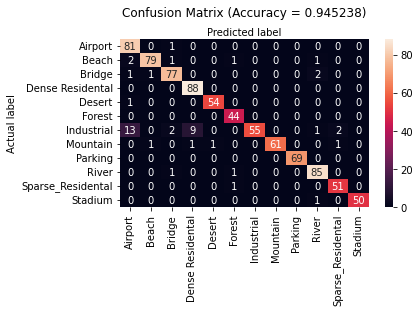

In [6]:
accuracy,y_classes=test(num_of_output_classes,X_test,t_test,model_name='vgg16_trained_cnn.hdf5',resized_pixel_size=100)

## Classifying Test Set From Randomly Pulling 50% of Training Data

27/27 [==============================] - 29s 1s/step
None


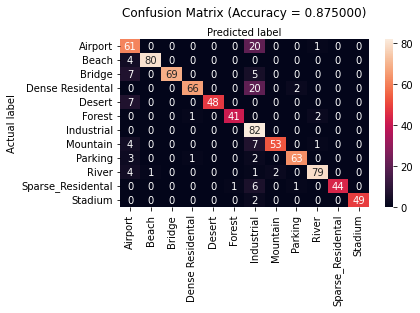

In [7]:
accuracy,y_classes=test(num_of_output_classes,X_test,t_test,model_name='vgg16_rand_pullout_50.hdf5',resized_pixel_size=100)

## Classifying Test Set From Randomly Pulling 80% of Training Data

27/27 [==============================] - 29s 1s/step
None


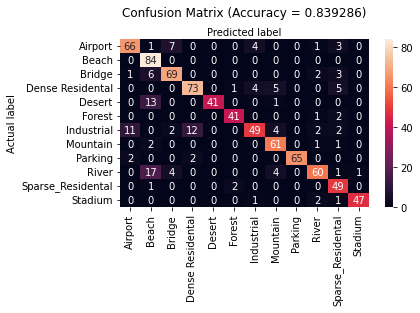

In [8]:
accuracy,y_classes=test(num_of_output_classes,X_test,t_test,model_name='vgg16_rand_pullout_80.hdf5',resized_pixel_size=100)

## Classifying 5 Images From Google Earth 
### Familiar Places to me
1. My childhood home in South Florida-Dense Residental
2. Fort Lauderdale Beach-Beach
3. My grandparents home in a village in New York-Sparse Residental 
4. My last summer residence outside of Chicago-Dense Residental
5. My Undergrad FSU- Industrial 
6. Ben Griffin Stadium at UF-Stadium

In [9]:
#Generates probability matrix of label assignment 

def custom_test_image_classification(model_name,Image):
    model = tensorflow.keras.models.load_model(model_name)
    y_proba = model.predict(Image)
    #Grabs largest probability for each photo belonging to a certain class 
    y_class = np.argmax(y_proba,axis=1)
    return y_proba,y_class

In [10]:
path_of_custom_image_classes='My_Custom_Images'
filenames = os.listdir(path_of_custom_image_classes)
all_images=[]
print(filenames)

['Stadium.png', 'Beach.png', 'Industrial.png', 'Dense-Residental_2.png', 'Sparse_Residental.png', 'Dense_Residental_1.png']


In [11]:
for file in filenames:
    image = Image.open(os.path.join(path_of_custom_image_classes,file))
    image = cv2.imread(os.path.join(path_of_custom_image_classes, file))
    image = cv2.resize(image,(100,100))
    all_images.append(image)

ALL_images=np.array(all_images);
All_custom_images=np.array(all_images)
All_custom_images_preprocess=tensorflow.keras.applications.vgg16.preprocess_input(All_custom_images, data_format=None);

In [12]:
# create figure
def plot_custom_images():
    fig = plt.figure(figsize=(10, 7))

    # setting values to rows and column variables
    rows = 2
    columns = 3
    
    # reading images
    Image1 = cv2.imread('My_Custom_Images'+ '/' + filenames[0])
    Image1 = cv2.cvtColor(Image1, cv2.COLOR_BGR2RGB)
    Image2 = cv2.imread('My_Custom_Images'+ '/' + filenames[1])
    Image2 = cv2.cvtColor(Image2, cv2.COLOR_BGR2RGB)
    Image3= cv2.imread('My_Custom_Images'+ '/' + filenames[2])
    Image3 = cv2.cvtColor(Image3, cv2.COLOR_BGR2RGB)
    Image4 = cv2.imread('My_Custom_Images'+ '/' + filenames[3])
    Image4 = cv2.cvtColor(Image4, cv2.COLOR_BGR2RGB)
    Image5 = cv2.imread('My_Custom_Images'+ '/' + filenames[4])
    Image5 = cv2.cvtColor(Image5, cv2.COLOR_BGR2RGB)
    Image6= cv2.imread('My_Custom_Images'+ '/' + filenames[5])
    Image6 = cv2.cvtColor(Image6, cv2.COLOR_BGR2RGB)

    # Adds a subplot at the 1st position
    fig.add_subplot(rows, columns, 1)

    # showing image
    plt.imshow(Image1)
    plt.axis('off')
    plt.title("Stadium")

    # Adds a subplot at the 2nd position
    fig.add_subplot(rows, columns, 2)

    # showing image
    plt.imshow(Image2)
    plt.axis('off')
    plt.title("Beach")

    # Adds a subplot at the 3rd position
    fig.add_subplot(rows, columns, 3)

    # showing image
    plt.imshow(Image3)
    plt.axis('off')
    plt.title("Industrial")

    # Adds a subplot at the 4th position
    fig.add_subplot(rows, columns, 4)

    # showing image
    plt.imshow(Image4)
    plt.axis('off')
    plt.title("Dense Residental2")

    # Adds a subplot at the 4th position
    fig.add_subplot(rows, columns, 5)

    # showing image
    plt.imshow(Image5)
    plt.axis('off')
    plt.title("Sparse Residential")

    # Adds a subplot at the 4th position
    fig.add_subplot(rows, columns, 6)

    # showing image
    plt.imshow(Image6)
    plt.axis('off')
    plt.title("Dense Residential1")

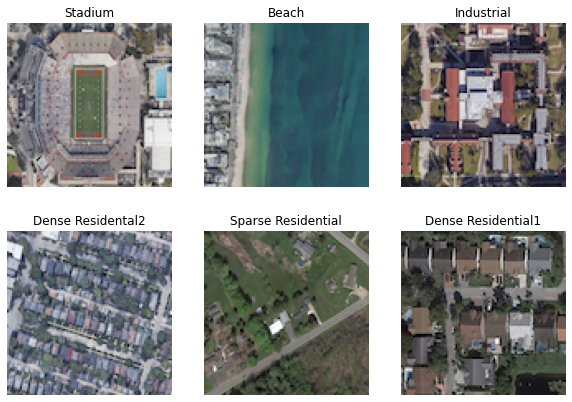

In [13]:
plot_custom_images()

In [14]:
y_proba,y_class=custom_test_image_classification('vgg16_trained_cnn.hdf5',All_custom_images_preprocess)

print("\nClass Probabilities of Custom Images")
df = pd.DataFrame(y_proba*100,columns=[class_names],index=[filenames])
pd.set_option('display.float_format', lambda x: f'{x:.5f}')
display(HTML(df.to_html()))

1/1 [==============================] - 0s 287ms/step

Class Probabilities of Custom Images


,Airport,Beach,Bridge,Dense Residental,Desert,Forest,Industrial,Mountain,Parking,River,Sparse_Residental,Stadium
Stadium.png,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,100.00000
Beach.png,0.00443,99.86625,0.05148,0.00061,0.00009,0.00212,0.00038,0.00471,0.01947,0.05040,0.00004,0.00003
Industrial.png,0.46289,0.00001,0.09114,3.57703,0.00019,0.00001,95.68348,0.00007,0.02901,0.00293,0.15216,0.00108
Dense-Residental_2.png,0.00013,0.00000,0.00002,99.81361,0.00000,0.00000,0.18571,0.00005,0.00023,0.00025,0.00000,0.00000
Sparse_Residental.png,0.02156,0.00002,0.24136,0.06124,0.00005,0.00015,0.04564,0.00010,0.00275,0.00244,99.62451,0.00018
Dense_Residental_1.png,0.26387,0.00002,0.00847,82.47323,0.00098,0.00025,7.91963,0.00138,0.02534,0.00252,9.30399,0.00032


They all worked! I did have to make sure I focused on the proper area. For example, it became easily confused when I had industrial buildings around the stadium. Thus, the algorithm clearly has a height above the earth it works well at. 

## Using Lime on Custom Images

In [15]:
#pip install lime

In [16]:
import lime
from lime import lime_image
from lime import submodular_pick
from skimage.segmentation import mark_boundaries


In [17]:
#print(y_proba.shape) # 6 images x 12 classes
Indices=np.argsort(y_proba,axis=1)
Top_3_classes=Indices[:,9:12]
#print(Top_3_classes)
Sorted_probabilities=np.sort(y_proba*100,axis=1)
Top_3_probabilties=Sorted_probabilities[:,9:12]
#print(Top_3_probabilties)

for i in range(6):
    print('\n',filenames[i])
    print('-----------------')
    print("Top three most likely classes:") 
    print(class_names[Top_3_classes[i,0]],class_names[Top_3_classes[i,1]],class_names[Top_3_classes[i,2]],sep=',')
    print("Top three probabilities(percentage):")
    print(Top_3_probabilties[i,0],Top_3_probabilties[i,1],Top_3_probabilties[i,2],sep=',')


 Stadium.png
-----------------
Top three most likely classes:
Parking,River,Stadium
Top three probabilities(percentage):
5.0565234e-07,4.5966044e-06,100.0

 Beach.png
-----------------
Top three most likely classes:
River,Bridge,Beach
Top three probabilities(percentage):
0.050404288,0.051477253,99.86625

 Industrial.png
-----------------
Top three most likely classes:
Airport,Dense Residental,Industrial
Top three probabilities(percentage):
0.46289015,3.5770316,95.68348

 Dense-Residental_2.png
-----------------
Top three most likely classes:
River,Industrial,Dense Residental
Top three probabilities(percentage):
0.00024655098,0.18570612,99.81361

 Sparse_Residental.png
-----------------
Top three most likely classes:
Dense Residental,Bridge,Sparse_Residental
Top three probabilities(percentage):
0.0612372,0.24136002,99.62451

 Dense_Residental_1.png
-----------------
Top three most likely classes:
Industrial,Sparse_Residental,Dense Residental
Top three probabilities(percentage):
7.91963

In [18]:
 # reading images
Image1 = cv2.imread('My_Custom_Images'+ '/' + filenames[0])
Image1 = cv2.cvtColor(Image1, cv2.COLOR_BGR2RGB)
Image2 = cv2.imread('My_Custom_Images'+ '/' + filenames[1])
Image2 = cv2.cvtColor(Image2, cv2.COLOR_BGR2RGB)
Image3= cv2.imread('My_Custom_Images'+ '/' + filenames[2])
Image3 = cv2.cvtColor(Image3, cv2.COLOR_BGR2RGB)
Image4 = cv2.imread('My_Custom_Images'+ '/' + filenames[3])
Image4 = cv2.cvtColor(Image4, cv2.COLOR_BGR2RGB)
Image5 = cv2.imread('My_Custom_Images'+ '/' + filenames[4])
Image5 = cv2.cvtColor(Image5, cv2.COLOR_BGR2RGB)
Image6= cv2.imread('My_Custom_Images'+ '/' + filenames[5])
Image6 = cv2.cvtColor(Image6, cv2.COLOR_BGR2RGB)

In [19]:
# Loads trained model 
model_name='vgg16_trained_cnn.hdf5'
model = tensorflow.keras.models.load_model(model_name)

In [20]:
# Used Functions From ML Blog 
def generate_prediction_sample(Image, model, weight = 0.1, show_positive = True, hide_background = False):
    '''
    Method to display and highlight super-pixels used by the black-box model to make predictions
    '''
    explainer = lime_image.LimeImageExplainer()
    exp = explainer.explain_instance(Image, 
                                 model.predict, 
                                 top_labels=3, 
                                 hide_color=0, 
                                 num_samples=1000)
    exp_class=exp.top_labels[0]
    image, mask = exp.get_image_and_mask(exp_class, 
                                         positive_only=show_positive, 
                                         num_features=10, 
                                         hide_rest=hide_background,
                                         min_weight=weight
                                        )
    #Using heat-map to highlight the importance of each super-pixel for the model prediction
    dict_heatmap = dict(exp.local_exp[exp_class])
    heatmap = np.vectorize(dict_heatmap.get)(exp.segments) 
    clear_output()
    return image, mask,heatmap
    

In [21]:
def plot_lime(image,mask,heatmap):
   
    plt.imshow(mark_boundaries(image, mask))
    plt.axis('off')
    plt.title('Most important super-pixel picked up by LIME')
    plt.show()


    plt.imshow(heatmap, cmap = 'RdBu', vmin  = -heatmap.max(), vmax = heatmap.max())
    plt.colorbar()
    plt.axis('off')
    plt.title('Explanation Heatmap using LIME')
    plt.show()

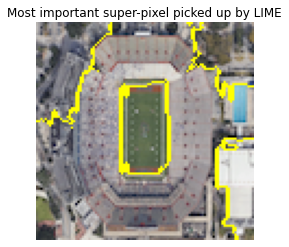

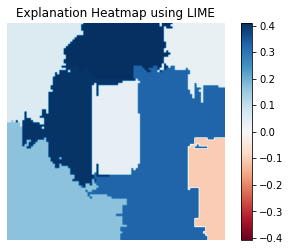

In [22]:
[image, mask,heatmap]=generate_prediction_sample(Image1, model,weight = 0.15)
print('\n\n\n')
plot_lime(image,mask,heatmap)

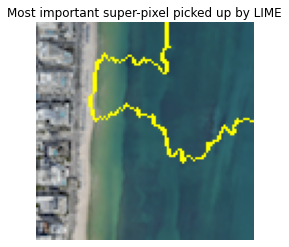

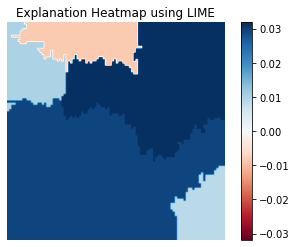

In [23]:
[image, mask,heatmap]=generate_prediction_sample(Image2, model,weight = 0.03)
print('\n\n\n')
plot_lime(image,mask,heatmap)

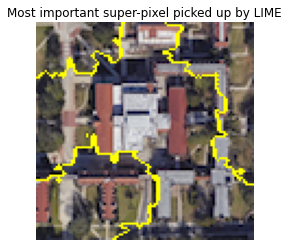

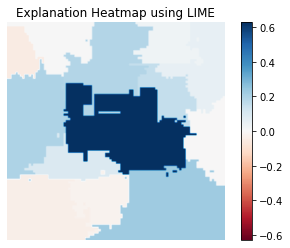

In [24]:
[image, mask,heatmap]=generate_prediction_sample(Image3, model,weight = 0.1)
print('\n\n\n')
plot_lime(image,mask,heatmap)

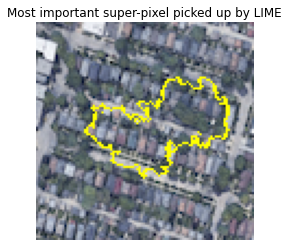

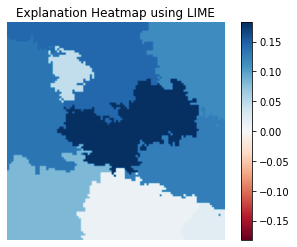

In [25]:
[image, mask,heatmap]=generate_prediction_sample(Image4, model,weight = 0.15)
print('\n\n\n')
plot_lime(image,mask,heatmap)

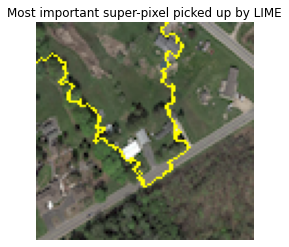

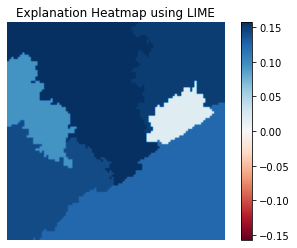

In [26]:
[image, mask,heatmap]=generate_prediction_sample(Image5, model,weight = 0.15)
print('\n\n\n')
plot_lime(image,mask,heatmap)

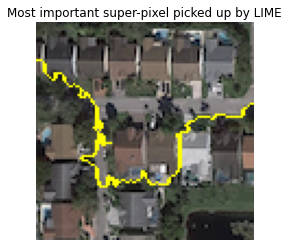

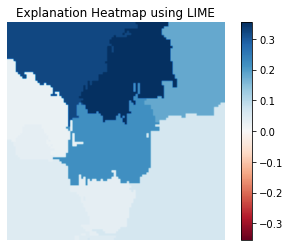

In [27]:
[image, mask,heatmap]=generate_prediction_sample(Image6, model,weight = 0.15)
print('\n\n\n')
plot_lime(image,mask,heatmap)